<a href="https://colab.research.google.com/github/idnunez/MAT-421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT421 Module F

Isaac Nunez

Section 20.1: Numerical Differentiation Problem Statement

Numerical Grid: A set of evenly spaced points over the domain of a function. The difference between points is referred to as step size or spacing.

In python, the linspace or arange function can be used to create one-dimensional numerical grids.

In [3]:
import numpy as np

# linspace takes 3 arguments: the starting value, the ending value, and the number of values in the grid.
A = np.linspace(0,100,11)

print(A)

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


A function can be defined over a grid to create a discrete representation of the function, even if the original function is continuous.

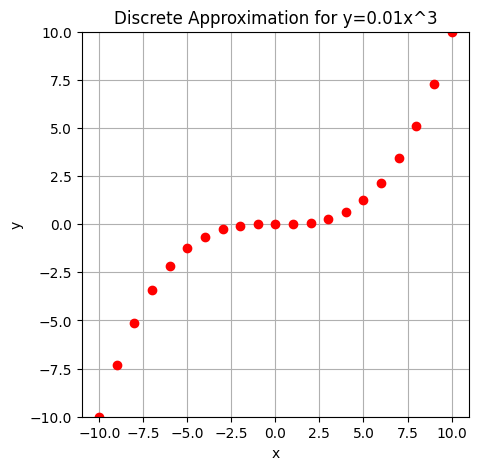

In [14]:
import matplotlib.pyplot as plt

x = np.linspace(-10,10,21)
y = (0.01)*x**3

plt.figure(figsize = (5,5))
plt.plot(x,y,'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-10,10)
plt.title('Discrete Approximation for y=0.01x^3')
plt.grid()
plt.show()

Discrete representations of functions can be used to approximate the derivative over a function.

Section 20.2: Finite Difference Approximating Derivatives

To approximate the derivative of a function over a finite numerical grid, the difference between each point can be found to create the derivative.

Forward difference: Uses the difference between f(x) and f(x + h)
Backward difference: Uses the difference between f(x - h) and f(x)
Central difference: Uses the difference between f(x - h) and f(x + h)

These formulas for the derivative can also be derived by using the Taylor series for f(x), solving for f'(x), and replacing $x - x_{j}$ with h, resulting in an approximation for the derivative.

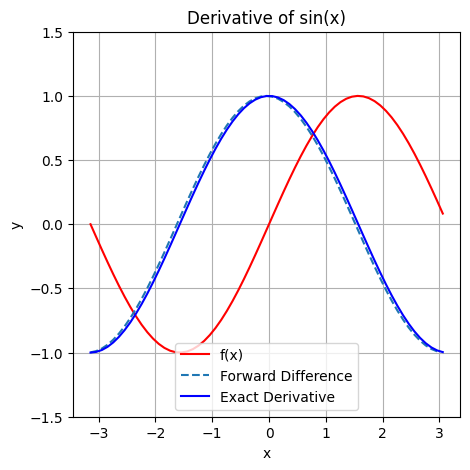

In [26]:
#Approximation for the derivative of sin(x) using forward difference

#Assemble numerical grid for x and f
h = 0.1 #spacing
x = np.arange(-np.pi, np.pi, h)
f = np.sin(x)

#Approximate derivative for f using np.diff
fdiff = np.diff(f)/h
deriv_exact = np.cos(x)
xdiff = x[:-1:]

#Plot function
plt.figure(figsize = (5,5))
plt.plot(x,f,'r-',label = 'f(x)')
plt.plot(xdiff,fdiff, '--', label = 'Forward Difference')
plt.plot(x,deriv_exact,'b', label = 'Exact Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1.5,1.5)
plt.title('Derivative of sin(x)')
plt.legend()
plt.grid()
plt.show()

Section 20.3: Approximations of Higher Order Derivatives

Using a similar method as first order derivatives, Taylor series can be used to approximate higher order derivatives. When adding the resulting equations obtained from solving for $f(x_{j-1})$ and $f(x_{j+1})$ respectively, we can obtain the following formula for approximating second derivative:

$f''(x_{j}) \approx \frac{f(x_{j+1}) - 2f(x_{j}) + f(x_{j+1})}{h^{2}}$

This can then be used in order to approximate the second derivative.

Section 20.4: Numerical Differentiation with Noise

Noise can be caused by small errors in measurement or other outside factors.

Even though the effects on the data may be only slight, it can have significant effects on approximating the derivative.

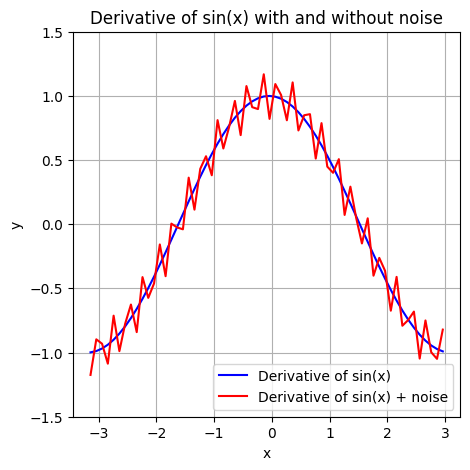

In [27]:
#Approximation for the derivative of sin(x) using forward difference

omega = 150
epsilon = 0.01

#Assemble numerical grid for x and f
h = 0.1 #spacing
x = np.arange(-np.pi, np.pi, h)
f = np.sin(x)
f_noise = np.sin(x) + epsilon*np.cos(omega*x)

#Approximate derivative for f using np.diff
fdiff = np.diff(f)/h
fdiff_noise = np.diff(f_noise)/h
xdiff = x[:-1:]

#Plot function
plt.figure(figsize = (5,5))
plt.plot(xdiff,fdiff,'b-',label = 'Derivative of sin(x)')
plt.plot(xdiff,fdiff_noise, 'r-', label = 'Derivative of sin(x) + noise')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1.5,1.5)
plt.title('Derivative of sin(x) with and without noise')
plt.legend()
plt.grid()
plt.show()